Import population data Khlong Toei District, Bangkok, Thailand 
Reference : https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok

In [4]:
# The code was removed by Watson Studio for sharing.

,District,Code,Thai,Population,Latitude,Longitude
0,Huai Khwang,17,ห้วยขวาง,"78,175",13.776667,100.579444
1,Lak Si,41,หลักสี่,"109,770",13.887500,100.578889
2,Nong Chok,3,หนองจอก,"157,138",13.855556,100.862500
3,Nong Khaem,23,หนองแขม,"150,218",13.704722,100.348889
4,Sai Mai,42,สายไหม,"188,123",13.919167,100.645833


Import Library

In [5]:
from bs4 import BeautifulSoup
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation



!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [6]:
CLIENT_ID = 'AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0' # your Foursquare ID
CLIENT_SECRET = 'H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z' # your Foursquare Secret
CategoryID = '4d4b7105d754a06374d81259'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0
CLIENT_SECRET:H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z


In [7]:
address = 'Khlong Toei, Bangkok, TH'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

13.7090525 100.5749075


In [8]:
search_query = 'Thailand'
radius = 30000
print(search_query + ' .... OK!')

Thailand .... OK!


In [9]:
url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CategoryID, CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&ll=13.7090525,100.5749075&v=20180604&query=Thailand&radius=30000&limit=100'

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5a3f630cc1fd001bfe81d2'},
 'response': {'venues': [{'id': '4ce4d204d678a1cdfc2cac0c',
    'name': 'Starbucks Coffee (Thailand) Co., Ltd.',
    'location': {'address': '388 Sukhumvit Rd.',
     'crossStreet': 'at Exchange Tower, 12th Fl.',
     'lat': 13.735397095235477,
     'lng': 100.56154025222274,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.735397095235477,
       'lng': 100.56154025222274}],
     'distance': 3269,
     'postalCode': '10110',
     'cc': 'TH',
     'neighborhood': 'Khlong Toei',
     'city': 'คลองเตย',
     'state': 'กรุงเทพมหานคร',
     'country': 'ประเทศไทย',
     'formattedAddress': ['388 Sukhumvit Rd. (at Exchange Tower, 12th Fl.)',
      'คลองเตย',
      'กรุงเทพมหานคร 10110',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

In [11]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4ce4d204d678a1cdfc2cac0c,388 Sukhumvit Rd.,TH,คลองเตย,ประเทศไทย,"at Exchange Tower, 12th Fl.",3269,"[388 Sukhumvit Rd. (at Exchange Tower, 12th Fl...","[{'label': 'display', 'lat': 13.73539709523547...",13.735397,100.561540,Khlong Toei,10110,กรุงเทพมหานคร,"Starbucks Coffee (Thailand) Co., Ltd.",v-1582972845,NaN
1,"[{'id': '5032897c91d4c4b30a586d69', 'name': 'P...",False,59fdbcac1bc7043d43525a9c,NaN,TH,พระนคร,ประเทศไทย,NaN,848,"[พระนคร, กรุงเทพมหานคร 10110, ประเทศไทย]","[{'label': 'display', 'lat': 13.7159605, 'lng'...",13.715960,100.571590,NaN,10110,กรุงเทพมหานคร,Dogtails Thailand,v-1582972845,NaN
2,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5d174064d29cbb0023d86a9e,589 Phra Sumen Rd.,TH,พระนคร,ประเทศไทย,NaN,9326,"[589 Phra Sumen Rd., พระนคร, กรุงเทพมหานคร 102...","[{'label': 'display', 'lat': 13.757423, 'lng':...",13.757423,100.504490,Bowon Niwet,10200,กรุงเทพมหานคร,Lambretta Thailand Shop & Cafe,v-1582972845,NaN
3,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",False,57e9fc07498e7653e21e8a8f,NaN,TH,วัฒนา,ประเทศไทย,NaN,2754,"[วัฒนา, กรุงเทพมหานคร, ประเทศไทย]","[{'label': 'display', 'lat': 13.73320423739524...",13.733204,100.569351,NaN,NaN,กรุงเทพมหานคร,CT Cafeteria by Club Thailand,v-1582972845,NaN
4,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,4ff131ede4b0b29eb1d907c8,NaN,TH,NaN,ประเทศไทย,NaN,4405,[ประเทศไทย],"[{'label': 'display', 'lat': 13.74118385593264...",13.741184,100.551128,NaN,NaN,NaN,อิ่มอร่อย @ ibis Erawan Thailand,v-1582972845,NaN


In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories', 'id', 'location.neighborhood','location.lat', 'location.lng'] 
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,id,neighborhood,lat,lng
0,"Starbucks Coffee (Thailand) Co., Ltd.",Coffee Shop,4ce4d204d678a1cdfc2cac0c,Khlong Toei,13.735397,100.561540
1,Dogtails Thailand,Pet Service,59fdbcac1bc7043d43525a9c,NaN,13.715960,100.571590
2,Lambretta Thailand Shop & Cafe,Café,5d174064d29cbb0023d86a9e,Bowon Niwet,13.757423,100.504490
3,CT Cafeteria by Club Thailand,Japanese Restaurant,57e9fc07498e7653e21e8a8f,NaN,13.733204,100.569351
4,อิ่มอร่อย @ ibis Erawan Thailand,Asian Restaurant,4ff131ede4b0b29eb1d907c8,NaN,13.741184,100.551128
5,Kitaohji Thailand,Japanese Restaurant,5516aedf498ea477175fff0a,Vadhana,13.730388,100.582330
6,Thailand Tobacco Monopoly Flea Market,Flea Market,4ef7b905f9ab2e66823e164c,NaN,13.723640,100.556827
7,Sing Thang Yeng Thailand (ซิงตังเอี๊ยง),Snack Place,4c7b941d2d3ba143164c94d0,NaN,13.743931,100.530260
8,Nespresso By Coffee Concept Thailand,Coffee Shop,53ef1403498e350b17a3a3ae,NaN,13.811759,100.618591
9,Club Thailand Cafe,Café,4d9bc611f41ba14369bee8b3,NaN,13.733114,100.568958


In [332]:
dataframe_filtered["neighborhood"].replace(np.nan, 'Bangkok', inplace=True)
dataframe_filtered

,name,categories,id,neighborhood,lat,lng
0,"Starbucks Coffee (Thailand) Co., Ltd.",Coffee Shop,4ce4d204d678a1cdfc2cac0c,Khlong Toei,13.735397,100.561540
1,Dogtails Thailand,Pet Service,59fdbcac1bc7043d43525a9c,Bangkok,13.715960,100.571590
2,Lambretta Thailand Shop & Cafe,Café,5d174064d29cbb0023d86a9e,Bowon Niwet,13.757423,100.504490
3,CT Cafeteria by Club Thailand,Japanese Restaurant,57e9fc07498e7653e21e8a8f,Bangkok,13.733204,100.569351
4,อิ่มอร่อย @ ibis Erawan Thailand,Asian Restaurant,4ff131ede4b0b29eb1d907c8,Bangkok,13.741184,100.551128
5,Kitaohji Thailand,Japanese Restaurant,5516aedf498ea477175fff0a,Vadhana,13.730388,100.582330
6,Thailand Tobacco Monopoly Flea Market,Flea Market,4ef7b905f9ab2e66823e164c,Bangkok,13.723640,100.556827
7,Sing Thang Yeng Thailand (ซิงตังเอี๊ยง),Snack Place,4c7b941d2d3ba143164c94d0,Bangkok,13.743931,100.530260
8,Nespresso By Coffee Concept Thailand,Coffee Shop,53ef1403498e350b17a3a3ae,Bangkok,13.811759,100.618591
9,Club Thailand Cafe,Café,4d9bc611f41ba14369bee8b3,Bangkok,13.733114,100.568958


In [331]:
dataframe_filtered.name

0                 Starbucks Coffee (Thailand) Co., Ltd.
1                                     Dogtails Thailand
2                        Lambretta Thailand Shop & Cafe
3                         CT Cafeteria by Club Thailand
4                      อิ่มอร่อย @ ibis Erawan Thailand
5                                     Kitaohji Thailand
6                 Thailand Tobacco Monopoly Flea Market
7               Sing Thang Yeng Thailand (ซิงตังเอี๊ยง)
8                  Nespresso By Coffee Concept Thailand
9                                    Club Thailand Cafe
10                                             thailand
11                                              Unatoto
12                       Thailand Dessert @Amarin Tower
13                                Thailand Boat Noodles
14                               Starbucks (สตาร์บัคส์)
15                         Thailand Street Food & Snack
16                                     Thailand Tonight
17                                    Ippudo (อิ

In [333]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [334]:
manhattan_venues = getNearbyVenues(names=dataframe_filtered['neighborhood'],
                                   latitudes=dataframe_filtered['lat'],
                                   longitudes=dataframe_filtered['lng']
                                  )


Khlong Toei
Bangkok
Bowon Niwet
Bangkok
Bangkok
Vadhana
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Vadhana
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
คลองเตย
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bowon Niwet
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Pathum Wan
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok
Bangkok


In [335]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Khlong Toei',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### B. Get the venue's overall rating

In [336]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [337]:
venue_id = dataframe_filtered['id'] # ID of Conca Cucina Italian Restaurant
print(venue_id)

0     4ce4d204d678a1cdfc2cac0c
1     59fdbcac1bc7043d43525a9c
2     5d174064d29cbb0023d86a9e
3     57e9fc07498e7653e21e8a8f
4     4ff131ede4b0b29eb1d907c8
5     5516aedf498ea477175fff0a
6     4ef7b905f9ab2e66823e164c
7     4c7b941d2d3ba143164c94d0
8     53ef1403498e350b17a3a3ae
9     4d9bc611f41ba14369bee8b3
10    57d26d62498e018d16d2b84c
11    5c01028ddd12f8003947eb2c
12    4e78278545ddedd585cbe99d
13    56fcc4b2498e5f850f28159d
14    4bcec312c564ef3b4dbaeef0
15    50e6e7b3e4b0410885ab6cea
16    4b0587fbf964a520bfaa22e3
17    54b9f5d8498e7c86d1913fe0
18    4b46a783f964a520512626e3
19    588e3c21e18e653095f281ef
20    545496ab498e75ddfe3bcda1
21    50382342e4b05b4c7a7315aa
22    55ceec64498e7647e66af6de
23    50e6e93fe4b0e43377adb3d0
24    5707ac73498ea5a842c3daa1
25    55732e3e498e61b3fa7c2f7c
26    4cf5d57fc020b60cbc0d1d75
27    579de061498e1748935e5e82
28    53ae73ce498eeba73dfb9be1
29    505c549fe4b0ef5c54dea309
30    5632e3ed498eacee1a55d3ad
31    5c2e0a8757a537002cdb33ae
32    4d

In [338]:
#url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

venue_id = dataframe_filtered['id']

for i in range(1):
    url = []
    for urls in venue_id:
        url2 = f'https://api.foursquare.com/v2/venues/{urls}?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}'
        #url = url2
        url.append(url2)
    print(url)
#loop_append()


['https://api.foursquare.com/v2/venues/4ce4d204d678a1cdfc2cac0c?client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&v=20180604', 'https://api.foursquare.com/v2/venues/59fdbcac1bc7043d43525a9c?client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&v=20180604', 'https://api.foursquare.com/v2/venues/5d174064d29cbb0023d86a9e?client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&v=20180604', 'https://api.foursquare.com/v2/venues/57e9fc07498e7653e21e8a8f?client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&v=20180604', 'https://api.foursquare.com/v2/venues/4ff131ede4b0b29eb1d907c8?client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&v=20180604', 'https://

In [339]:
#dataframes2 = 'https://api.foursquare.com/v2/venues/5504337c498e3c6d809fb925?client_id=AUREGHH5E55QA11PSLQRHVGGZGCFNC1DRJAYQZ4ABO201AQ0&client_secret=H3RD0BJXOIPOY2TNKBIDWYKI2HX31CNADWQDV14PA3K55A0Z&v=20180604'
try:
    print(dataframes2['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [340]:

try:
    for urls in url:
        page = requests.get(urls).json()
        print(page)
except:
    print('This venue has not been rated yet.')

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5b76aba297001b4e332d'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5c5f78a484001b6f47da'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5c5eb1cac00025e79f71'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5c4f0cc1fd001b7322fd'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5c7aedbcad001c5f3855'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5c9fbe61c9001bd557ef'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e5a5ccdb57e88001b35e400'}, '

In [342]:
print(dataframe_filtered.shape)
dataframe_filtered.head()

(50, 6)


,name,categories,id,neighborhood,lat,lng
0,"Starbucks Coffee (Thailand) Co., Ltd.",Coffee Shop,4ce4d204d678a1cdfc2cac0c,Khlong Toei,13.735397,100.561540
1,Dogtails Thailand,Pet Service,59fdbcac1bc7043d43525a9c,Bangkok,13.715960,100.571590
2,Lambretta Thailand Shop & Cafe,Café,5d174064d29cbb0023d86a9e,Bowon Niwet,13.757423,100.504490
3,CT Cafeteria by Club Thailand,Japanese Restaurant,57e9fc07498e7653e21e8a8f,Bangkok,13.733204,100.569351
4,อิ่มอร่อย @ ibis Erawan Thailand,Asian Restaurant,4ff131ede4b0b29eb1d907c8,Bangkok,13.741184,100.551128


In [343]:
dataframe_filtered.groupby('neighborhood').count()

,name,categories,id,lat,lng
neighborhood,,,,,
Bangkok,43,43,43,43,43
Bowon Niwet,2,2,2,2,2
Khlong Toei,1,1,1,1,1
Pathum Wan,1,1,1,1,1
Vadhana,2,2,2,2,2
คลองเตย,1,1,1,1,1


In [344]:
print('There are {} uniques categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 28 uniques categories.


In [345]:
# one hot encoding
dataframe_filtered_onehot = pd.get_dummies(dataframe_filtered[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dataframe_filtered_onehot['neighborhood'] = dataframe_filtered['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dataframe_filtered_onehot.columns[-1]] + list(dataframe_filtered_onehot.columns[:-1])
dataframe_filtered_onehot = dataframe_filtered_onehot[fixed_columns]

dataframe_filtered_onehot.head()

,neighborhood,Afghan Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Coffee Shop,Dessert Shop,Fish & Chips Shop,Flea Market,...,Ramen Restaurant,Restaurant,Salad Place,Seafood Restaurant,Snack Place,Steakhouse,Street Food Gathering,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Khlong Toei,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangkok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bowon Niwet,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bangkok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bangkok,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
dataframe_filtered_onehot.shape

(50, 29)

In [347]:
dataframe_filtered_onehot.head()

,neighborhood,Afghan Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Coffee Shop,Dessert Shop,Fish & Chips Shop,Flea Market,...,Ramen Restaurant,Restaurant,Salad Place,Seafood Restaurant,Snack Place,Steakhouse,Street Food Gathering,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Khlong Toei,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangkok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bowon Niwet,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bangkok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bangkok,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
dataframe_filtered_grouped = dataframe_filtered_onehot.groupby('neighborhood').mean().reset_index()
dataframe_filtered_grouped

,neighborhood,Afghan Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Coffee Shop,Dessert Shop,Fish & Chips Shop,Flea Market,...,Ramen Restaurant,Restaurant,Salad Place,Seafood Restaurant,Snack Place,Steakhouse,Street Food Gathering,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Bangkok,0.023256,0.046512,0.023256,0.023256,0.116279,0.139535,0.046512,0.023256,0.023256,...,0.023256,0.023256,0.023256,0.023256,0.023256,0.023256,0.0,0.023256,0.046512,0.023256
1,Bowon Niwet,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
2,Khlong Toei,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Pathum Wan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Vadhana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,คลองเตย,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [349]:
dataframe_filtered_grouped.shape

(6, 29)

In [350]:
num_top_venues = 3

for hood in dataframe_filtered_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = dataframe_filtered_grouped[dataframe_filtered_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bangkok----
               venue  freq
0        Coffee Shop  0.14
1               Café  0.12
2  Korean Restaurant  0.09


----Bowon Niwet----
                   venue  freq
0                   Café   0.5
1  Street Food Gathering   0.5
2      Afghan Restaurant   0.0


----Khlong Toei----
               venue  freq
0        Coffee Shop   1.0
1  Afghan Restaurant   0.0
2  Korean Restaurant   0.0


----Pathum Wan----
               venue  freq
0       Dessert Shop   1.0
1  Afghan Restaurant   0.0
2  Korean Restaurant   0.0


----Vadhana----
                 venue  freq
0  Japanese Restaurant   1.0
1     Asian Restaurant   0.0
2      Thai Restaurant   0.0


----คลองเตย----
               venue  freq
0   Ramen Restaurant   1.0
1  Afghan Restaurant   0.0
2   Asian Restaurant   0.0




In [351]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [352]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = dataframe_filtered_grouped['neighborhood']

for ind in np.arange(dataframe_filtered_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dataframe_filtered_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangkok,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
1,Bowon Niwet,Street Food Gathering,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Asian Restaurant,Bakery,Breakfast Spot,Coffee Shop,Dessert Shop,Fish & Chips Shop
2,Khlong Toei,Coffee Shop,Vegetarian / Vegan Restaurant,Thai Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Dessert Shop,Fish & Chips Shop,Flea Market
3,Pathum Wan,Dessert Shop,Vegetarian / Vegan Restaurant,Thai Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Coffee Shop,Fish & Chips Shop,Flea Market
4,Vadhana,Japanese Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Asian Restaurant,Bakery,Breakfast Spot,Café,Coffee Shop,Dessert Shop,Fish & Chips Shop


In [353]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [355]:
# set number of clusters
kclusters = 5

dataframe_filtered_clustering = dataframe_filtered_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dataframe_filtered_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 2, 1, 0, 4], dtype=int32)

In [356]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dataframe_filtered_merged = dataframe_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dataframe_filtered_merged = dataframe_filtered_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')

dataframe_filtered_merged.head() # check the last columns!

,name,categories,id,neighborhood,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Starbucks Coffee (Thailand) Co., Ltd.",Coffee Shop,4ce4d204d678a1cdfc2cac0c,Khlong Toei,13.735397,100.561540,2,Coffee Shop,Vegetarian / Vegan Restaurant,Thai Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Dessert Shop,Fish & Chips Shop,Flea Market
1,Dogtails Thailand,Pet Service,59fdbcac1bc7043d43525a9c,Bangkok,13.715960,100.571590,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
2,Lambretta Thailand Shop & Cafe,Café,5d174064d29cbb0023d86a9e,Bowon Niwet,13.757423,100.504490,3,Street Food Gathering,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Asian Restaurant,Bakery,Breakfast Spot,Coffee Shop,Dessert Shop,Fish & Chips Shop
3,CT Cafeteria by Club Thailand,Japanese Restaurant,57e9fc07498e7653e21e8a8f,Bangkok,13.733204,100.569351,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
4,อิ่มอร่อย @ ibis Erawan Thailand,Asian Restaurant,4ff131ede4b0b29eb1d907c8,Bangkok,13.741184,100.551128,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery


In [278]:
#dataframe_filtered_merged = dataframe_filtered_merged.dropna()

In [357]:
dataframe_filtered_merged.head(50) # check the last columns!


,name,categories,id,neighborhood,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Starbucks Coffee (Thailand) Co., Ltd.",Coffee Shop,4ce4d204d678a1cdfc2cac0c,Khlong Toei,13.735397,100.561540,2,Coffee Shop,Vegetarian / Vegan Restaurant,Thai Restaurant,Asian Restaurant,Bakery,Breakfast Spot,Café,Dessert Shop,Fish & Chips Shop,Flea Market
1,Dogtails Thailand,Pet Service,59fdbcac1bc7043d43525a9c,Bangkok,13.715960,100.571590,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
2,Lambretta Thailand Shop & Cafe,Café,5d174064d29cbb0023d86a9e,Bowon Niwet,13.757423,100.504490,3,Street Food Gathering,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Asian Restaurant,Bakery,Breakfast Spot,Coffee Shop,Dessert Shop,Fish & Chips Shop
3,CT Cafeteria by Club Thailand,Japanese Restaurant,57e9fc07498e7653e21e8a8f,Bangkok,13.733204,100.569351,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
4,อิ่มอร่อย @ ibis Erawan Thailand,Asian Restaurant,4ff131ede4b0b29eb1d907c8,Bangkok,13.741184,100.551128,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
5,Kitaohji Thailand,Japanese Restaurant,5516aedf498ea477175fff0a,Vadhana,13.730388,100.582330,0,Japanese Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Asian Restaurant,Bakery,Breakfast Spot,Café,Coffee Shop,Dessert Shop,Fish & Chips Shop
6,Thailand Tobacco Monopoly Flea Market,Flea Market,4ef7b905f9ab2e66823e164c,Bangkok,13.723640,100.556827,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
7,Sing Thang Yeng Thailand (ซิงตังเอี๊ยง),Snack Place,4c7b941d2d3ba143164c94d0,Bangkok,13.743931,100.530260,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
8,Nespresso By Coffee Concept Thailand,Coffee Shop,53ef1403498e350b17a3a3ae,Bangkok,13.811759,100.618591,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
9,Club Thailand Cafe,Café,4d9bc611f41ba14369bee8b3,Bangkok,13.733114,100.568958,3,Coffee Shop,Café,Korean Restaurant,Asian Restaurant,Dessert Shop,Food Truck,Thai Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery


In [358]:
dataframe_filtered_merged.dtypes

name                       object
categories                 object
id                         object
neighborhood               object
lat                       float64
lng                       float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [359]:
dataframe_filtered_merged["Cluster Labels"]= dataframe_filtered_merged["Cluster Labels"].astype(int) 

In [360]:
dataframe_filtered_merged.dtypes

name                       object
categories                 object
id                         object
neighborhood               object
lat                       float64
lng                       float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [361]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_filtered_merged['lat'], dataframe_filtered_merged['lng'], dataframe_filtered_merged['neighborhood'], dataframe_filtered_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [362]:
%%capture
!pip install seaborn

In [370]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns


Text(0.5, 1.0, 'Clustering By District')

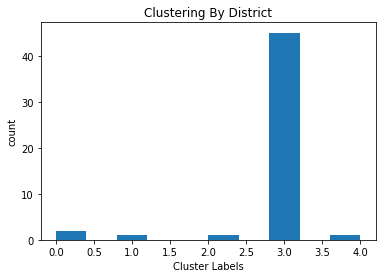

In [380]:
plt.pyplot.hist(dataframe_filtered_merged["Cluster Labels"])

# set x/y labels and plot title
plt.pyplot.xlabel("Cluster Labels")
plt.pyplot.ylabel("count")
plt.pyplot.title("Clustering By District")